In [57]:
import os
import numpy as np
from Custom import Mouse

import settings as s
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
batch = s.Batch()

In [59]:
mice_id = batch.id_first_dlp
mice = [Mouse(path='/home/pouple/PhD/Data/DLP/{}'.format(i), tag=['SPA'], dlp=True, rmgaps=True, verbose=True) for i in mice_id]



Processing files for mice 753564...
SPA_13012022_753562_2.DAT
Gaps removed - 13012022 : 
[0, 185]
[186, 300]
SPA_11012022_753562_1.DAT
Gaps removed - 11012022 : 
[42, 63]
[111, 132]
[136, 161]
[185, 251]
[283, 300]
SPA_10012022_753562_1.DAT
Gaps removed - 10012022 : 
[19, 51]
[82, 101]
[103, 155]
[156, 191]
[192, 300]
SPA_13012022_753562_1.DAT
Gaps removed - 13012022 : 
[146, 300]
SPA_11012022_753562_2.DAT
Gaps removed - 11012022 : 
[10, 31]
[32, 55]
[68, 85]
[87, 104]
[144, 172]
[195, 216]
[232, 249]
[252, 269]
[274, 298]
SPA_07012022_753562_1.DAT
Gaps removed - 07012022 : 
SPA_12012022_753562_1.DAT
Gaps removed - 12012022 : 
Processing files for mice 753572...
SPA_07012022_753572_1.DAT
Gaps removed - 07012022 : 
[0, 300]
SPA_11012022_753572_1.DAT
Gaps removed - 11012022 : 
[99, 300]
SPA_13012022_753572_2.DAT
Gaps removed - 13012022 : 
[17, 67]
[68, 102]
[105, 269]
[270, 300]
SPA_11012022_753572_2.DAT
Gaps removed - 11012022 : 
[0, 63]
[64, 99]
[100, 206]
[207, 297]
SPA_13012022_75357

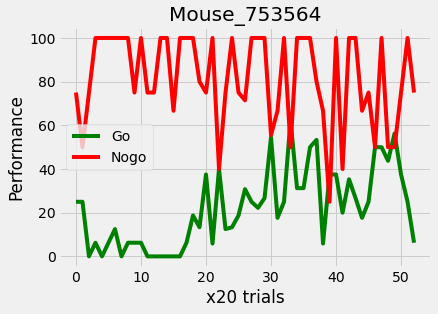

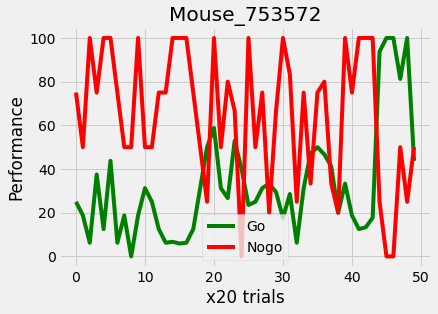

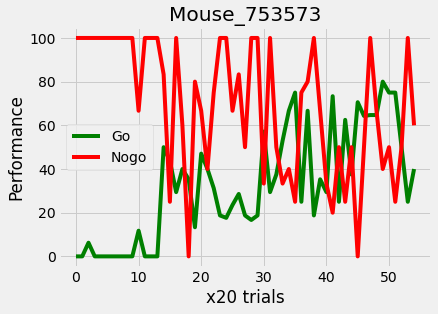

In [60]:
for mouse in mice:
    ttype = [f.tr_type for f in mouse.elphy]
    tcorr = [f.tr_corr for f in mouse.elphy]
    ttype = [t[:len(c)] for t, c in zip(ttype, tcorr)]
    ttype = np.concatenate(ttype)
    tcorr = np.concatenate(tcorr)
    
    task = ttype*tcorr
    
    sf = 20
    blocks = [ttype[i*sf:(i+1)*sf] for i in range(int(len(ttype)/sf))]
    corr_blocks = [tcorr[i*sf:(i+1)*sf] for i in range(int(len(tcorr)/sf))]

    go = []
    nogo = []
    for i, b in enumerate(blocks):
        idx_gos = np.where(b == 2)[0]
        idx_nogos = np.where(b == 1)[0]
        if len(idx_gos) > 0:
            go.append(np.sum(corr_blocks[i][idx_gos])*100/len(idx_gos))
            nogo.append(np.sum(corr_blocks[i][idx_nogos])*100/len(idx_nogos))
    plt.plot(go, c='green', label='Go')
    plt.plot(nogo, c='red', label='Nogo')
    plt.legend()
    plt.tight_layout()
    plt.xlabel('x20 trials')
    plt.ylabel('Performance')
    plt.title('Mouse_{}'.format(mouse.ID))
    plt.savefig('{}.png'.format(mouse.ID), dpi=250)
    plt.show()
    
        
    
    